In [1]:

import umap

import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import adjusted_mutual_info_score as AMI

from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (12,12)
import seaborn as sns
from scipy import sparse

sc.settings.verbosity =0


import harmonypy as hm
import scanorama
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import scvi


/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/marioam/miniconda3/envs/General_env/lib/python3.9/si

# SHOWING RESULTS

In [5]:
cluster_meta = pd.read_csv('csv/CLUSTERS_METADATA.csv', index_col=0)


# snRNA

In [20]:
save_key = mod = 'snRNA'
fig_path = f'figures/byTech/{mod}'
adata = sc.read(f'objects/byTech/{mod}.h5ad')
adata.obs['Manual_Annotation_l1'] = cluster_meta[cluster_meta['batch'].isin([mod])]['Manual_Annotation_l1']
adata.obs['Manual_Annotation_l2'] = cluster_meta[cluster_meta['batch'].isin([mod])]['Manual_Annotation_l2']


/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: Us

[<Axes: title={'center': 'leiden_scVI_0.3'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>,
 <Axes: title={'center': 'leiden_scVI_1.4'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>,
 <Axes: title={'center': 'leiden_scVI_2'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>,
 <Axes: title={'center': 'leiden_scVI_6'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>,
 <Axes: title={'center': 'leiden_scVI_10'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>]

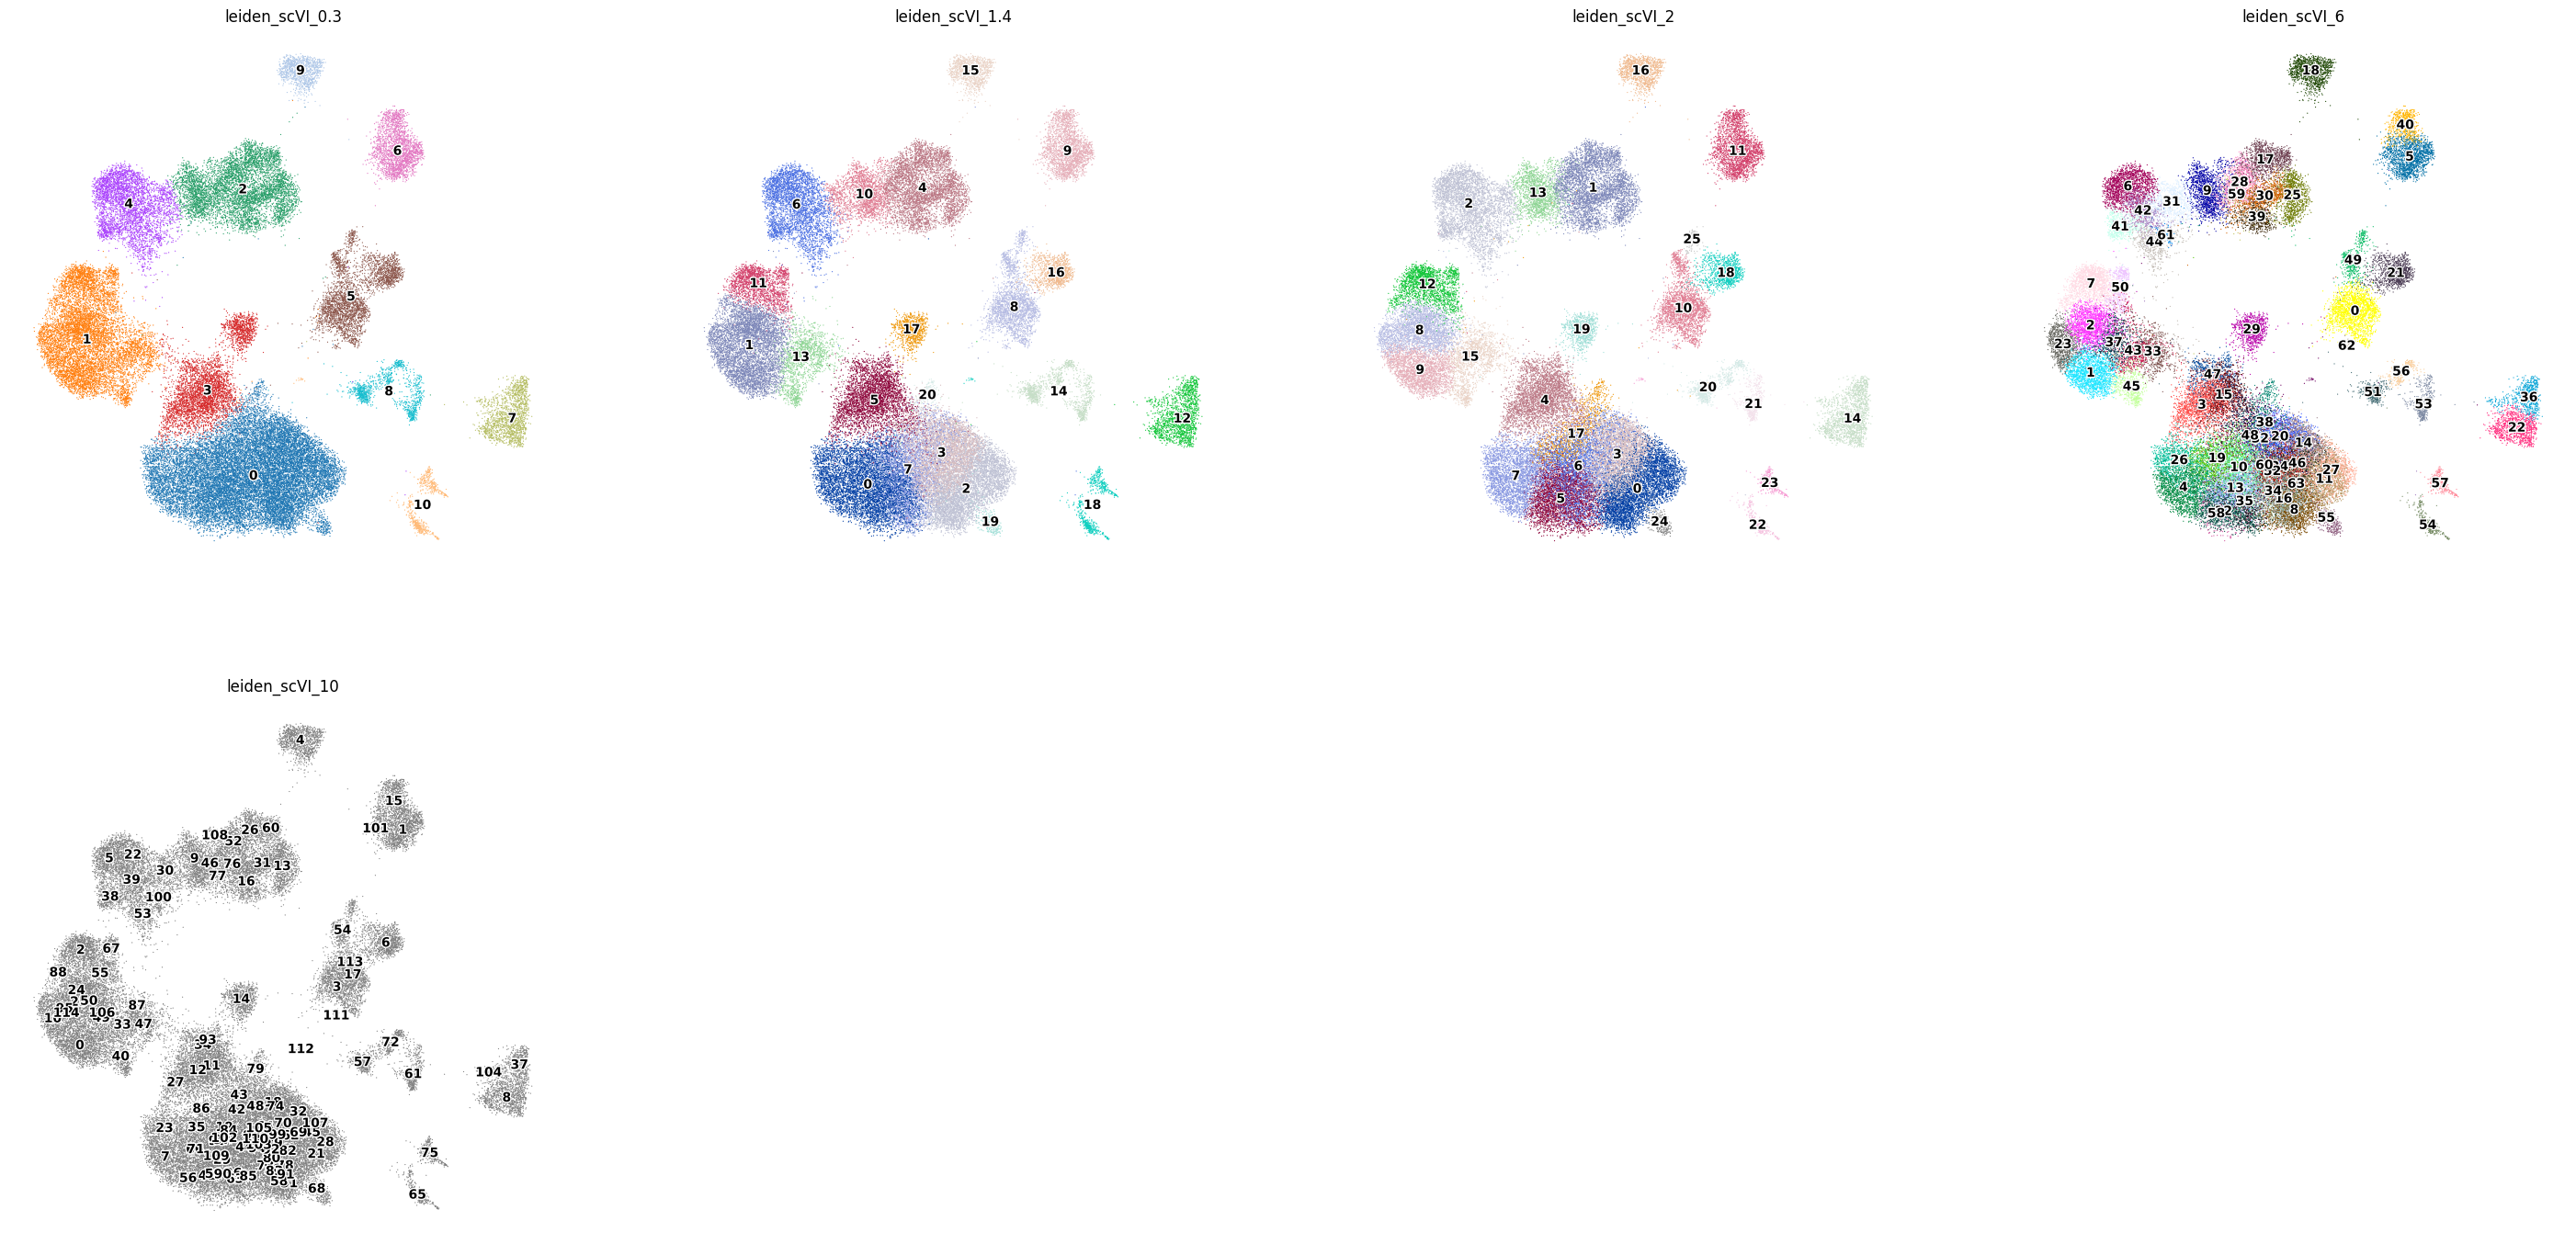

In [28]:
i = 'scVI'
plot_list = []
for k in [0.3,1.4,2,6,10]:
    plot_list.append(f'leiden_scVI_{k}')
sc.pl.embedding(adata, basis = f'Umap_{i}', color = plot_list, frameon = False, size = 3, legend_loc='on data', show=False, legend_fontoutline=2)


/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'Manual_Annotation_l1'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>,
 <Axes: title={'center': 'Manual_Annotation_l2'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>]

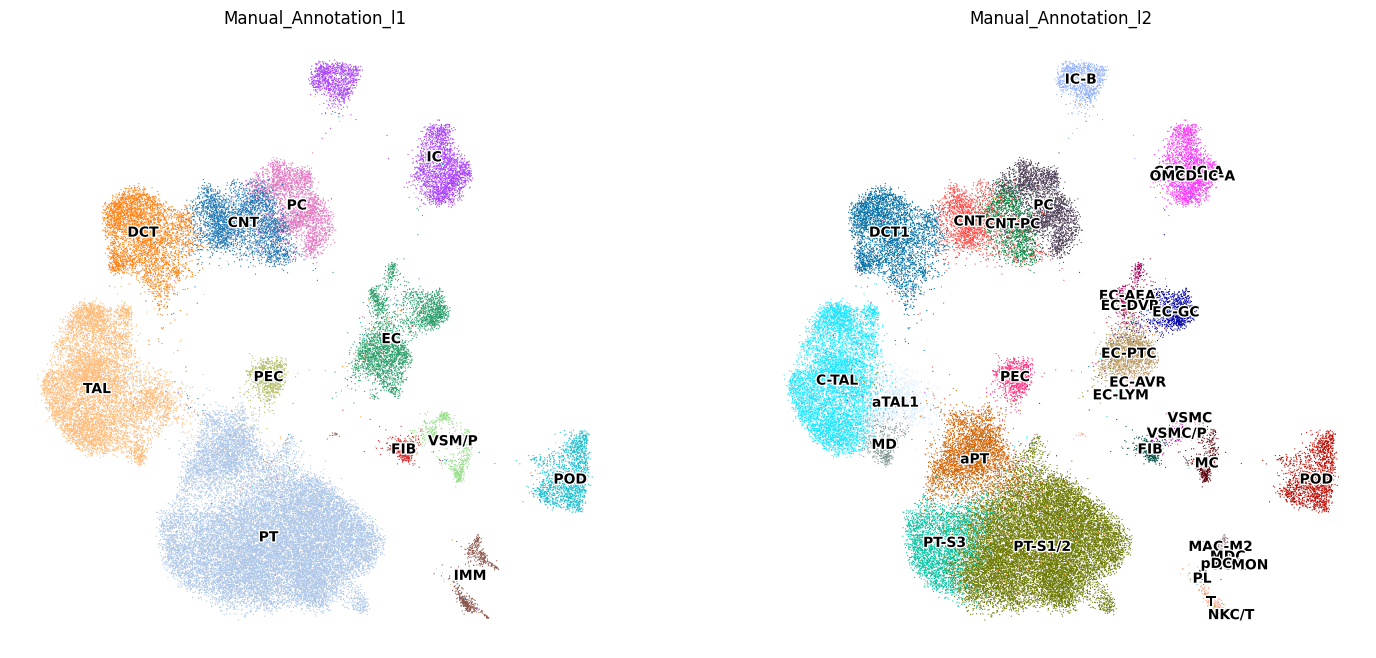

In [22]:
sc.pl.embedding(adata, basis = f'Umap_{i}', color = ['Manual_Annotation_l1','Manual_Annotation_l2'], frameon = False, size = 3, legend_loc='on data', show=False, legend_fontoutline=2)


In [32]:
counts = adata.obs.groupby('Manual_Annotation_l1')['leiden_scVI_10'].value_counts()

# Step 2: Unstack to create a DataFrame
percentages = counts.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))

# Step 2: Unstack to create a DataFrame
percentages_df = percentages.unstack(fill_value=0).T
most_abundant = percentages_df.apply(lambda x: pd.Series([x.max(), x.idxmax()], index=['Max_Percentage', 'Most_Abundant_Cell_Type']), axis=1)

# Step 2: Set the Leiden clusters as the index
most_abundant.index.name = 'Leiden_Cluster'
most_abundant.reset_index(inplace=True)
# most_abundant = most_abundant[~most_abundant['Most_Abundant_Cell_Type'].isin(present_ct)]
# most_abundant = most_abundant[most_abundant['Max_Percentage'] > 60]
ann_l1_dict = {}
for i in most_abundant.index:
    ann_l1_dict[most_abundant.loc[i,'Leiden_Cluster']] = most_abundant.loc[i,'Most_Abundant_Cell_Type']

/tmp/ipykernel_11051/1934662226.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  percentages = counts.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))


/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'Manual_Annotation_l1'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>,
 <Axes: title={'center': 'Manual_Annotation_l1_snRNA'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>]

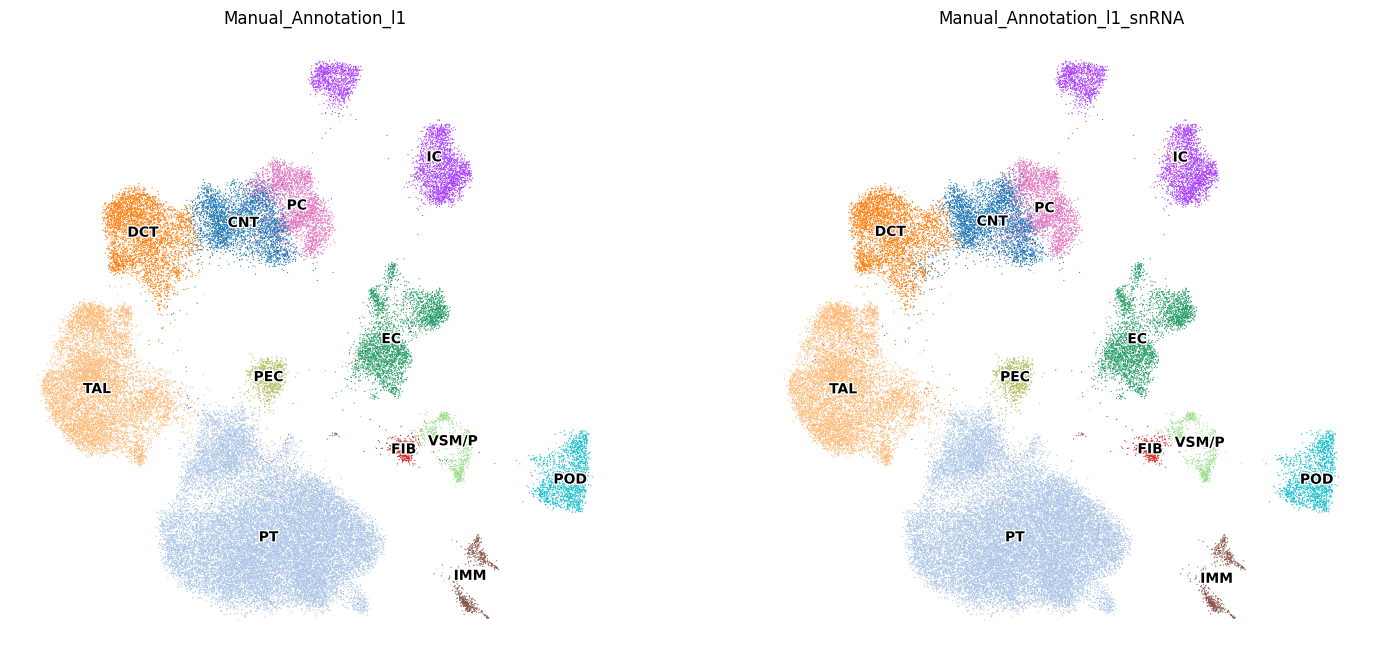

In [33]:
adata.obs['Manual_Annotation_l1_snRNA'] = [ann_l1_dict[i] for i in adata.obs['leiden_scVI_10']]
adata.obs.loc[adata[adata.obs['leiden_scVI_6'].isin(['51'])].obs.index,'Manual_Annotation_l1_snRNA'] = 'FIB'
adata.obs.loc[adata[adata.obs['leiden_scVI_6'].isin(['56'])].obs.index,'Manual_Annotation_l1_snRNA'] = 'VSM/P'

sc.pl.embedding(adata, basis = f'Umap_scVI', color = ['Manual_Annotation_l1','Manual_Annotation_l1_snRNA'], frameon = False, size = 3, legend_loc='on data', show=False, legend_fontoutline=2)

In [25]:
counts = adata.obs.groupby('Manual_Annotation_l2')['leiden_scVI_10'].value_counts()

# Step 2: Unstack to create a DataFrame
percentages = counts.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))

# Step 2: Unstack to create a DataFrame
percentages_df = percentages.unstack(fill_value=0).T
most_abundant = percentages_df.apply(lambda x: pd.Series([x.max(), x.idxmax()], index=['Max_Percentage', 'Most_Abundant_Cell_Type']), axis=1)

# Step 2: Set the Leiden clusters as the index
most_abundant.index.name = 'Leiden_Cluster'
most_abundant.reset_index(inplace=True)
# most_abundant = most_abundant[~most_abundant['Most_Abundant_Cell_Type'].isin(present_ct)]
# most_abundant = most_abundant[most_abundant['Max_Percentage'] > 60]
ann_l2_dict = {}
for i in most_abundant.index:
    ann_l2_dict[most_abundant.loc[i,'Leiden_Cluster']] = most_abundant.loc[i,'Most_Abundant_Cell_Type']

/tmp/ipykernel_11051/1106389082.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  percentages = counts.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))


/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/marioam/miniconda3/envs/General_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'Manual_Annotation_l2'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>,
 <Axes: title={'center': 'Manual_Annotation_l2_snRNA'}, xlabel='Umap_scVI1', ylabel='Umap_scVI2'>]

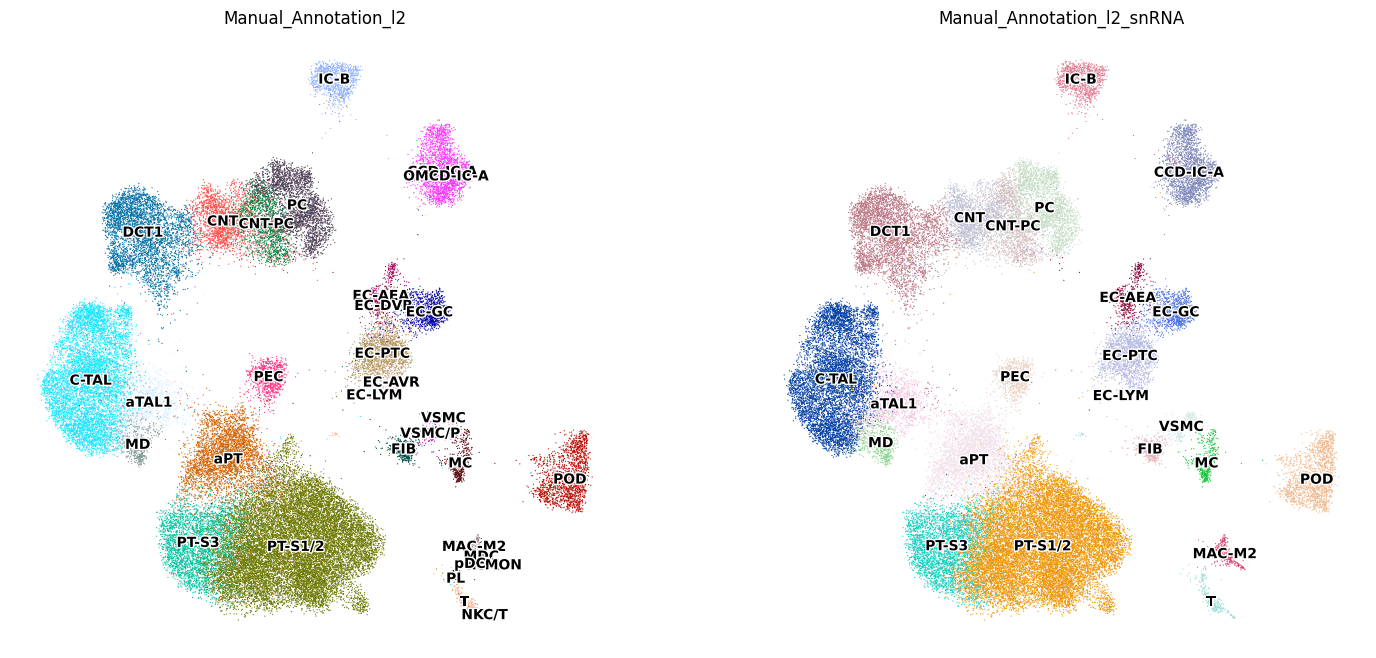

In [27]:
adata.obs['Manual_Annotation_l2_snRNA'] = [ann_l2_dict[i] for i in adata.obs['leiden_scVI_10']]
# adata.obs.loc[adata[adata.obs['leiden_scVI_6'].isin(['51'])].obs.index,'Manual_Annotation_l2_snRNA'] = 'FIB'
# adata.obs.loc[adata[adata.obs['leiden_scVI_6'].isin(['56'])].obs.index,'Manual_Annotation_l2_snRNA'] = 'VSM/P'

sc.pl.embedding(adata, basis = f'Umap_scVI', color = ['Manual_Annotation_l2','Manual_Annotation_l2_snRNA'], frameon = False, size = 3, legend_loc='on data', show=False, legend_fontoutline=2)

In [38]:
adata.write('objects/snRNA_Annotated.h5ad', compression='gzip')